<a href="https://colab.research.google.com/github/NedKost/MS-AAI-500-Team-Project/blob/Anova-Branch/Final_Collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

with open('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', 'r') as f:
    lines = f.readlines()
    for i in range(656688, 656694):  # Checking a few lines around the problematic row
        print(i, lines[i-1])  # Adjusting for 0-indexing


656688 04/25/2018,8:39,,,40.63529,-73.958206,"(40.63529, -73.958206)",OCEAN AVENUE                    ,,,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,,,,3887903,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,,,

656689 05/08/2018,16:13,,,40.61384,-73.981445,"(40.61384, -73.981445)",65 STREET                       ,,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,3896211,Box Truck,Station Wagon/Sport Utility Vehicle,,,

656690 04/29/2018,14:45,BROOKLYN,11208,40.668613,-73.86857,"(40.668613, -73.86857)",,,2602      LINDEN BOULEVARD              ,0,0,0,0,0,0,0,0,Unspecified,,,,,3891070,Station Wagon/Sport Utility Vehicle,,,,

656691 05/14/2018,15:00,,,40.617573,-74.15293,"(40.617573, -74.15293)",,,5         DEPPE PLACE                   ,0,0,0,0,0,0,0,0,Following Too Closely,Following Too Closely,Unspecified,,,3900833,Sedan,Station Wagon/Sport Utility Vehicle,,,

656692 05/06/2018,11:30,BRONX,10458,40.856358,-73.88591,"(40.856358, -73.

In [ ]:
df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_9161/2417375234.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026646 entries, 0 to 2026645
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
df['YEAR'] = df['CRASH DATE'].apply(lambda x: int(x.split('/')[2]))
df = df[df['YEAR'] > 2017]


In [ ]:
causation_mapping_df = pd.read_csv('causation_factor_mapping_file.csv')

def map_causation(cause, mapping_df):
    """Return the category corresponding to a causation factor."""

    if pd.isna(cause):
        return 'Unknown'

    return mapping_df[mapping_df['Causation Factor'] == cause]['Category'].iloc[0]

# Apply the mapping function to the 'CONTRIBUTING FACTOR VEHICLE 1' column
df['CAUSE CATEGORY'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: map_causation(x, causation_mapping_df))


 Convert 'CRASH DATE' and 'CRASH TIME' to Datetime Format

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME']).dt.time


For easier analysis, extracting specific time-based features


In [ ]:
# Extracting Month, Day, Day of the Week, and Hour
df['MONTH'] = df['CRASH DATE'].dt.month
df['DAY'] = df['CRASH DATE'].dt.day
df['DAY_OF_WEEK'] = df['CRASH DATE'].dt.dayofweek  # Returns 0 for Monday and 6 for Sunday
df['HOUR'] = df['CRASH DATE'].dt.hour


Handling missing values (if any)

In [ ]:
# Check for missing values in 'CRASH DATE' and 'CRASH TIME'
missing_dates = df['CRASH DATE'].isna().sum()
missing_times = df['CRASH TIME'].isna().sum()

print(f"Missing Dates: {missing_dates}")
print(f"Missing Times: {missing_times}")


Missing Dates: 0
Missing Times: 0


Outlier Detection

In [ ]:
print("Earliest Crash Date:", df['CRASH DATE'].min())
print("Latest Crash Date:", df['CRASH DATE'].max())


Earliest Crash Date: 2018-01-01 00:00:00
Latest Crash Date: 2023-09-16 00:00:00


Depending on the geographic region, accidents may have some seasonality (e.g., more accidents during winter months due to snow). Adding a 'SEASON' column

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['SEASON'] = df['MONTH'].apply(get_season)


Time of day, as in, classify 'CRASH TIME' into periods of the day

In [ ]:
from datetime import time

def get_time_period(t):
    if t < time(6, 0):
        return 'Night'
    elif t < time(12, 0):
        return 'Morning'
    elif t < time(17, 0):
        return 'Afternoon'
    elif t < time(20, 0):
        return 'Evening'
    else:
        return 'Night'

df['TIME_PERIOD'] = df['CRASH TIME'].apply(get_time_period)



In [ ]:
#checking for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dropped {duplicates} duplicates.")
else:
    print("No duplicates found.")


No duplicates found.


Now making sure the derived columns have been correctly created and populated:

In [ ]:
print(df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'HOUR', 'SEASON', 'TIME_PERIOD']].head())


   MONTH  DAY  DAY_OF_WEEK  HOUR  SEASON TIME_PERIOD
0      9   11            5     0  Autumn       Night
1      3   26            5     0  Spring     Morning
2      6   29            2     0  Summer     Morning
3      9   11            5     0  Autumn     Morning
4     12   14            1     0  Winter     Morning


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 837796 entries, 0 to 2026645
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     837796 non-null  datetime64[ns]
 1   CRASH TIME                     837796 non-null  object        
 2   BOROUGH                        546582 non-null  object        
 3   ZIP CODE                       546459 non-null  object        
 4   LATITUDE                       773527 non-null  float64       
 5   LONGITUDE                      773527 non-null  float64       
 6   LOCATION                       773527 non-null  object        
 7   ON STREET NAME                 624775 non-null  object        
 8   CROSS STREET NAME              404509 non-null  object        
 9   OFF STREET NAME                212276 non-null  object        
 10  NUMBER OF PERSONS INJURED      837790 non-null  float64       
 11 

EXPLORATORY ANALYSIS

Distribution of accidents throughout various time features.



In [ ]:
print(df['YEAR'].value_counts().sort_index())
print(df['MONTH'].value_counts().sort_index())
print(df['DAY'].value_counts().sort_index())
print(df['HOUR'].value_counts().sort_index())
print(df['DAY_OF_WEEK'].value_counts().sort_index())
print(df['SEASON'].value_counts())
print(df['TIME_PERIOD'].value_counts())


2018    231563
2019    211486
2020    112916
2021    110548
2022    103870
2023     67413
Name: YEAR, dtype: int64
1     72462
2     67003
3     73394
4     64217
5     75325
6     76214
7     74510
8     73407
9     69075
10    67301
11    62977
12    61911
Name: MONTH, dtype: int64
1     27303
2     27862
3     28047
4     27269
5     28220
6     27930
7     27542
8     27501
9     27725
10    27731
11    27550
12    28451
13    28372
14    28305
15    28599
16    28255
17    27321
18    28123
19    27588
20    27353
21    27414
22    26811
23    26807
24    27029
25    26287
26    27496
27    26606
28    26415
29    24965
30    24806
31    16113
Name: DAY, dtype: int64
0    837796
Name: HOUR, dtype: int64
0    119383
1    122175
2    121281
3    125002
4    132898
5    114815
6    102242
Name: DAY_OF_WEEK, dtype: int64
Summer    224131
Spring    212936
Winter    201376
Autumn    199353
Name: SEASON, dtype: int64
Afternoon    256249
Night        217041
Morning      215932
Evening    

Visualizing for better understanding

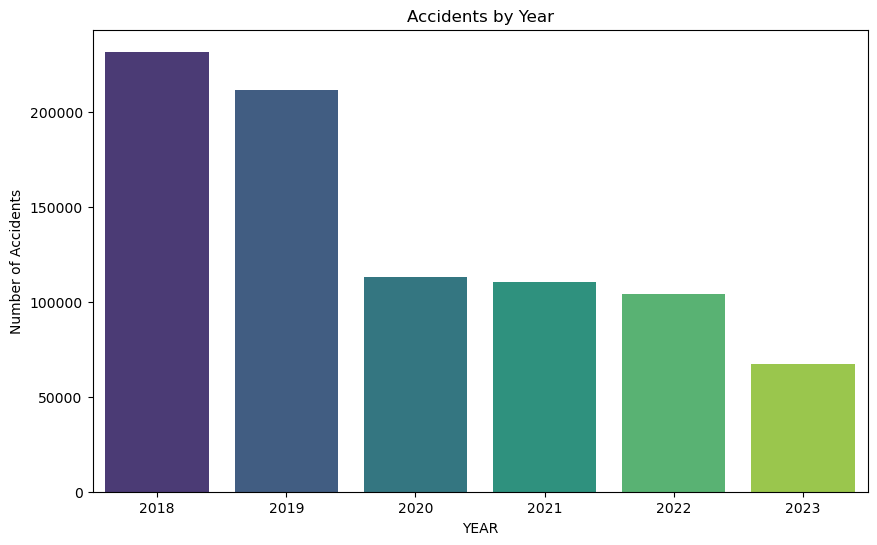

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly trends
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YEAR', palette="viridis")
plt.title('Accidents by Year')
plt.ylabel('Number of Accidents')
plt.show()


Monthly trends

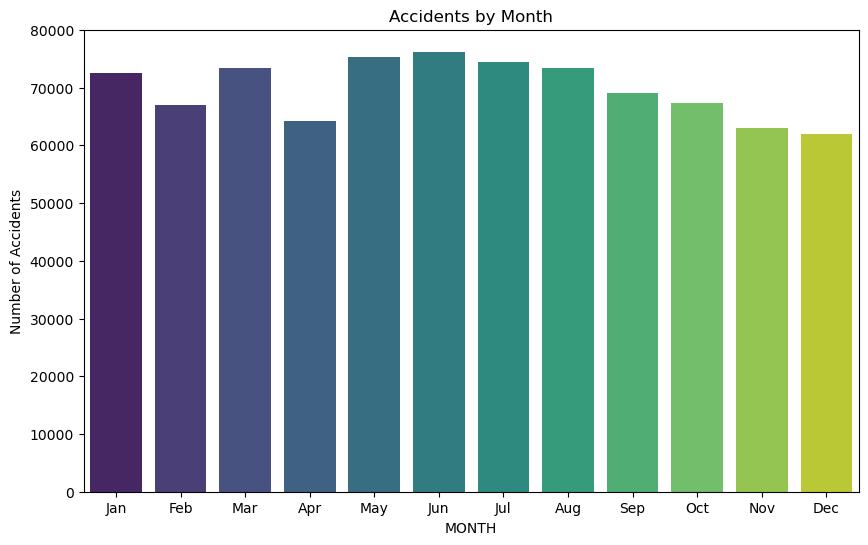

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MONTH', palette="viridis")
plt.title('Accidents by Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


We can see some upticks in accidents during certain months such as May, June, July, August (the summer months). Overall we are not seeing any major differences out spikes.

Hourly trends

In [ ]:
df['HOUR'] = df['CRASH TIME'].apply(lambda x: x.hour)
print(df['HOUR'].value_counts().sort_index())


0     32881
1     16097
2     12367
3     11213
4     12252
5     13274
6     20594
7     28071
8     44392
9     41583
10    39472
11    41820
12    44853
13    46645
14    54197
15    53111
16    57443
17    56918
18    50266
19    41390
20    34858
21    30735
22    28431
23    24933
Name: HOUR, dtype: int64


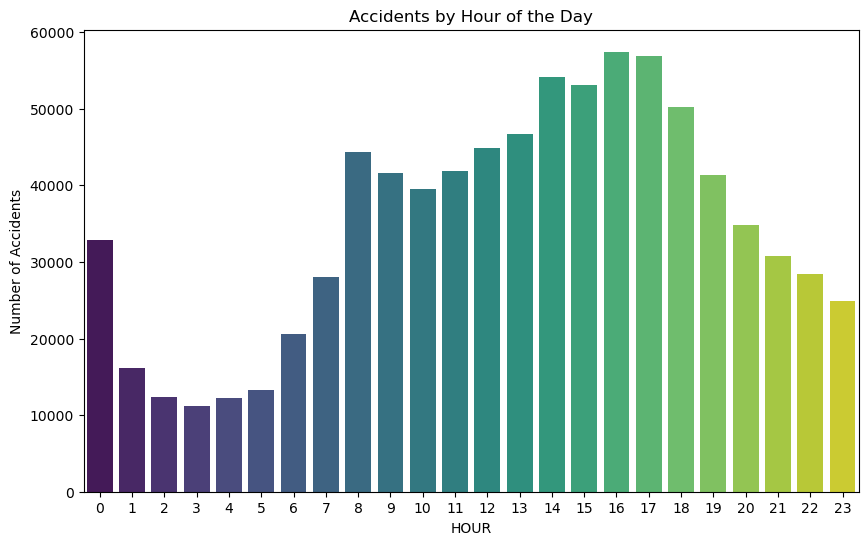

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HOUR', palette="viridis")
plt.title('Accidents by Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


I will do a significance test later to confirm, however the graph is showing a big difference in values between certain times.

Day of week trend

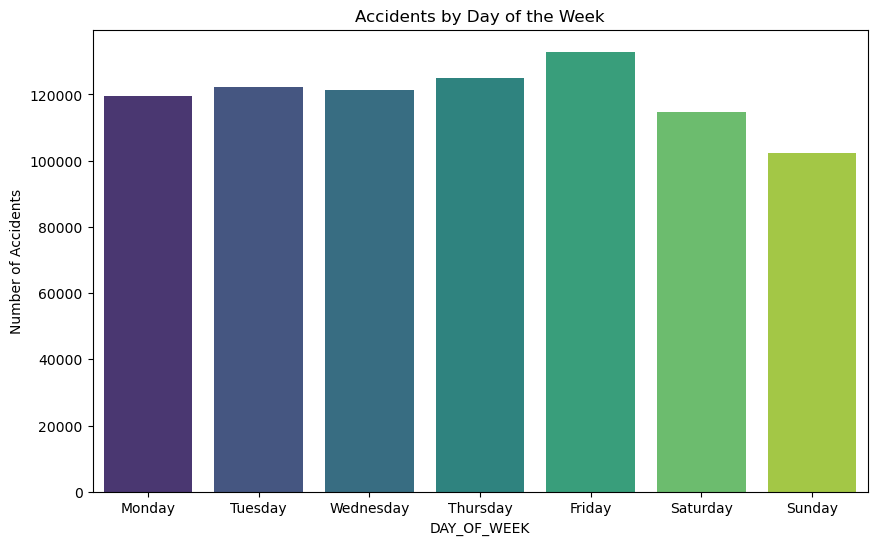

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_WEEK', palette="viridis")
plt.title('Accidents by Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


By time period

In [ ]:
print(df.columns)


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'YEAR', 'CAUSE CATEGORY', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'HOUR',
       'SEASON', 'TIME_PERIOD'],
      dtype='object')


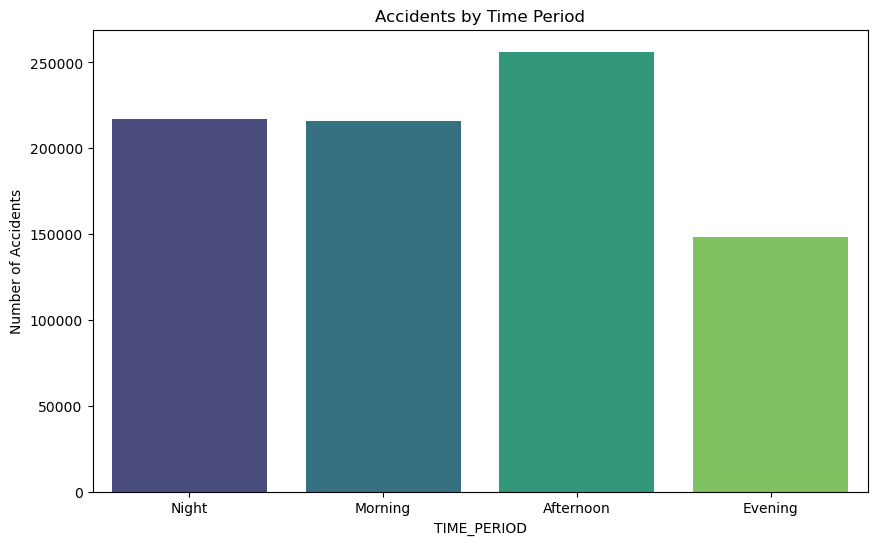

In [ ]:
df['TIME_PERIOD'] = df['CRASH TIME'].apply(get_time_period)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_PERIOD', palette="viridis", order=['Night', 'Morning', 'Afternoon', 'Evening'])
plt.title('Accidents by Time Period')
plt.ylabel('Number of Accidents')
plt.show()


Afternoon sees more accidents. Coming home from work, perhaps?

Seasons

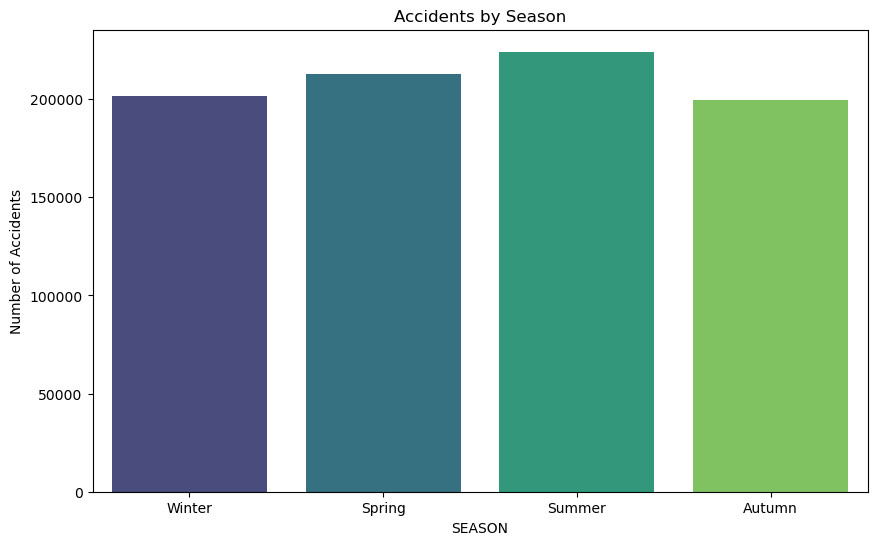

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SEASON', palette="viridis", order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Accidents by Season')
plt.ylabel('Number of Accidents')
plt.show()


COMPARATIVE ANALYSIS

Accidents by borough and time

Yealy trend

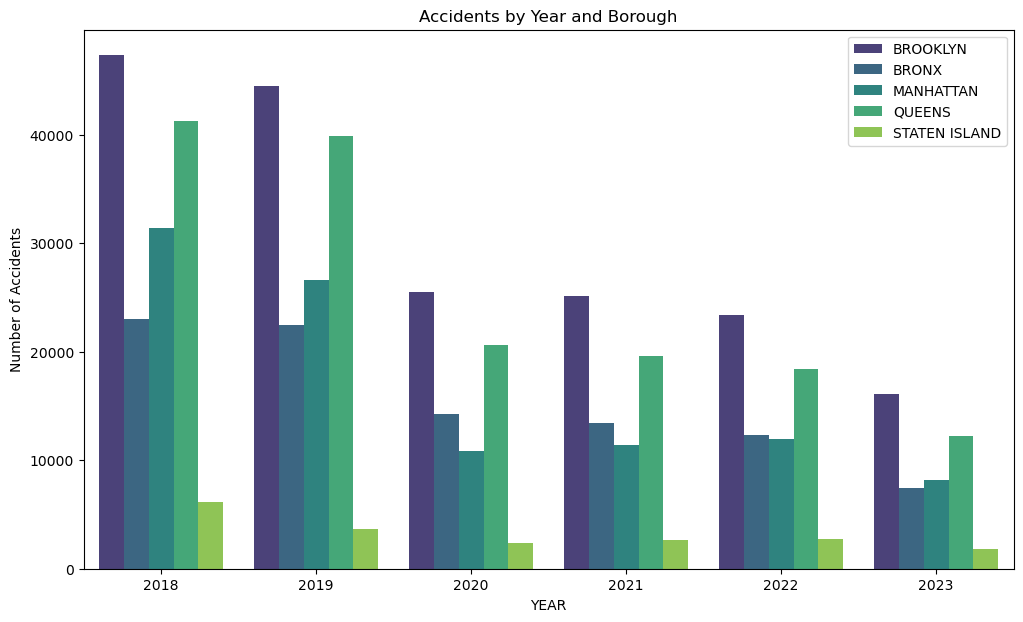

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='YEAR', hue='BOROUGH', palette="viridis")
plt.title('Accidents by Year and Borough')
plt.ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()


Monthly trend (by borough)

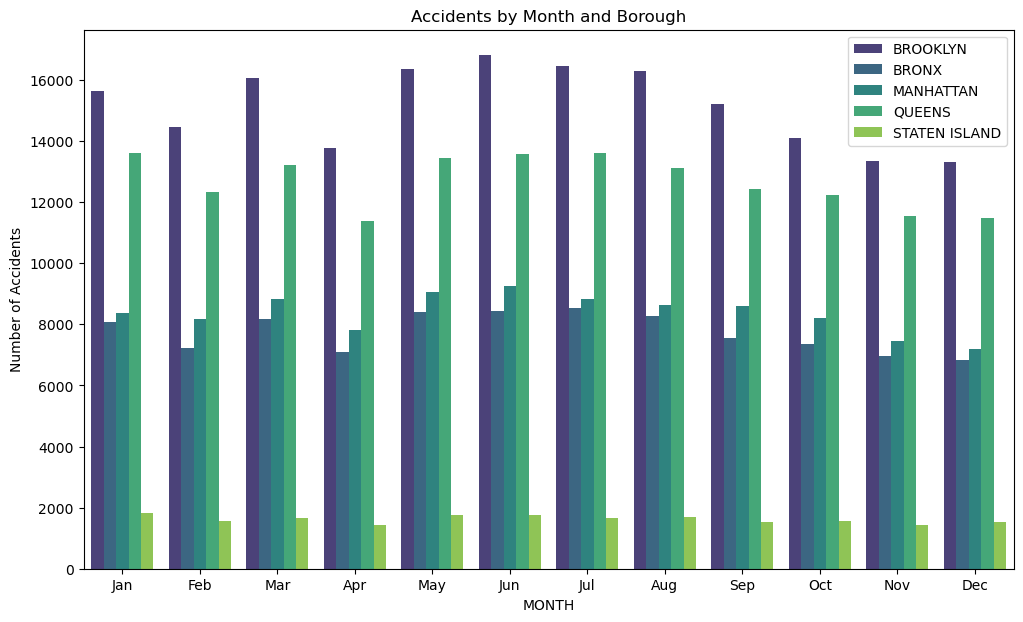

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='MONTH', hue='BOROUGH', palette="viridis")
plt.title('Accidents by Month and Borough')
plt.ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Hourly trend

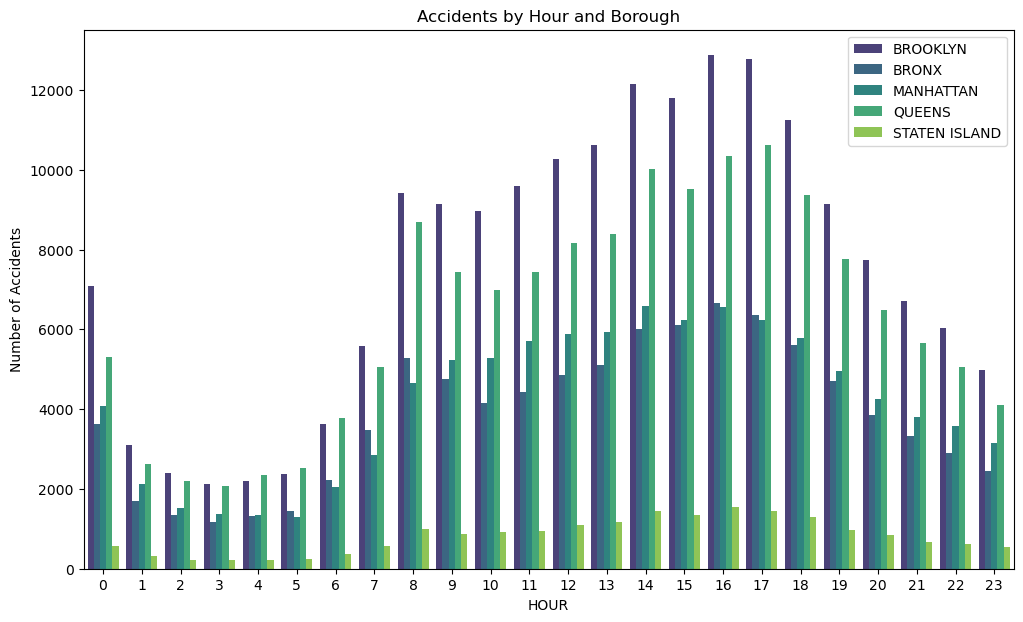

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='HOUR', hue='BOROUGH', palette="viridis")
plt.title('Accidents by Hour and Borough')
plt.ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()


ACCIDENTS BY SEVERITY AND TIME

Yearly trend

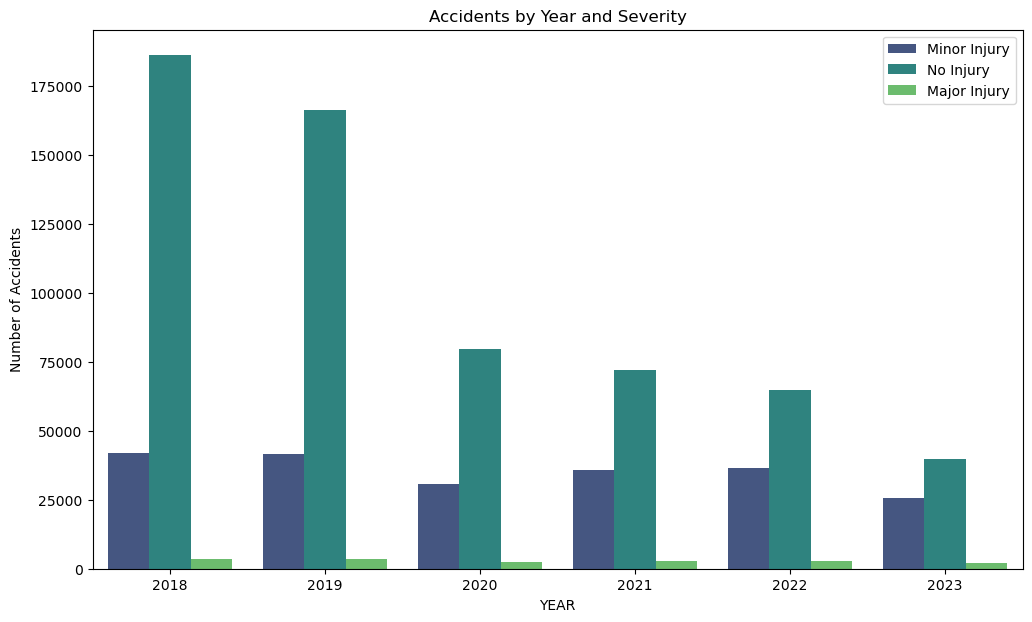

In [ ]:
df['SEVERITY'] = df['NUMBER OF PERSONS INJURED'].apply(lambda x: 'No Injury' if x == 0 else ('Minor Injury' if x < 3 else 'Major Injury'))
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='YEAR', hue='SEVERITY', palette="viridis")
plt.title('Accidents by Year and Severity')
plt.ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()


Hourly by severity

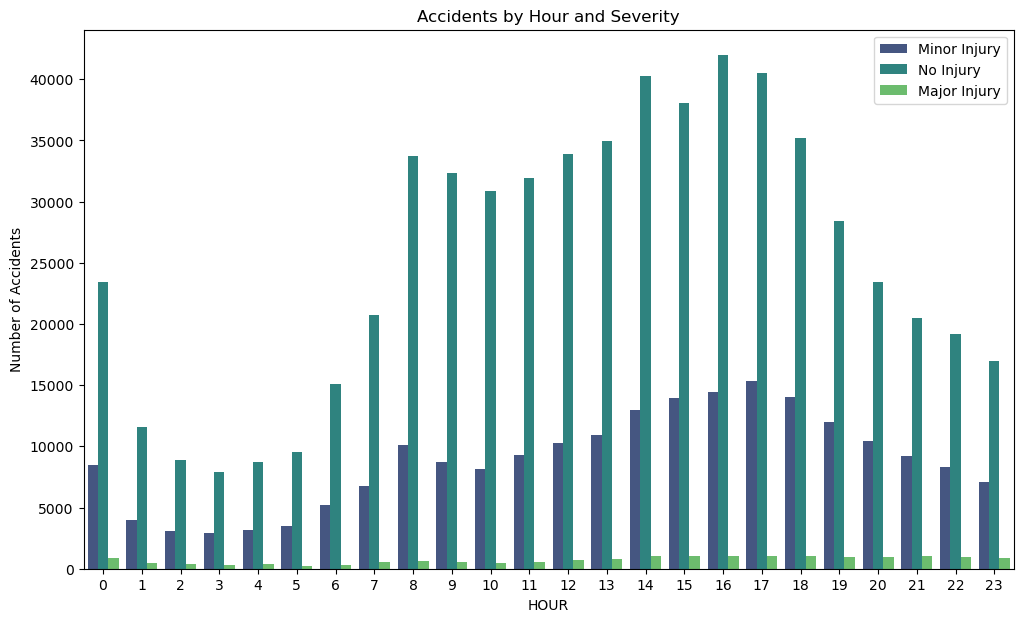

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='HOUR', hue='SEVERITY', palette="viridis")
plt.title('Accidents by Hour and Severity')
plt.ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()


ACCIDENTS BY CAUSES AND TIME

In [ ]:
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']


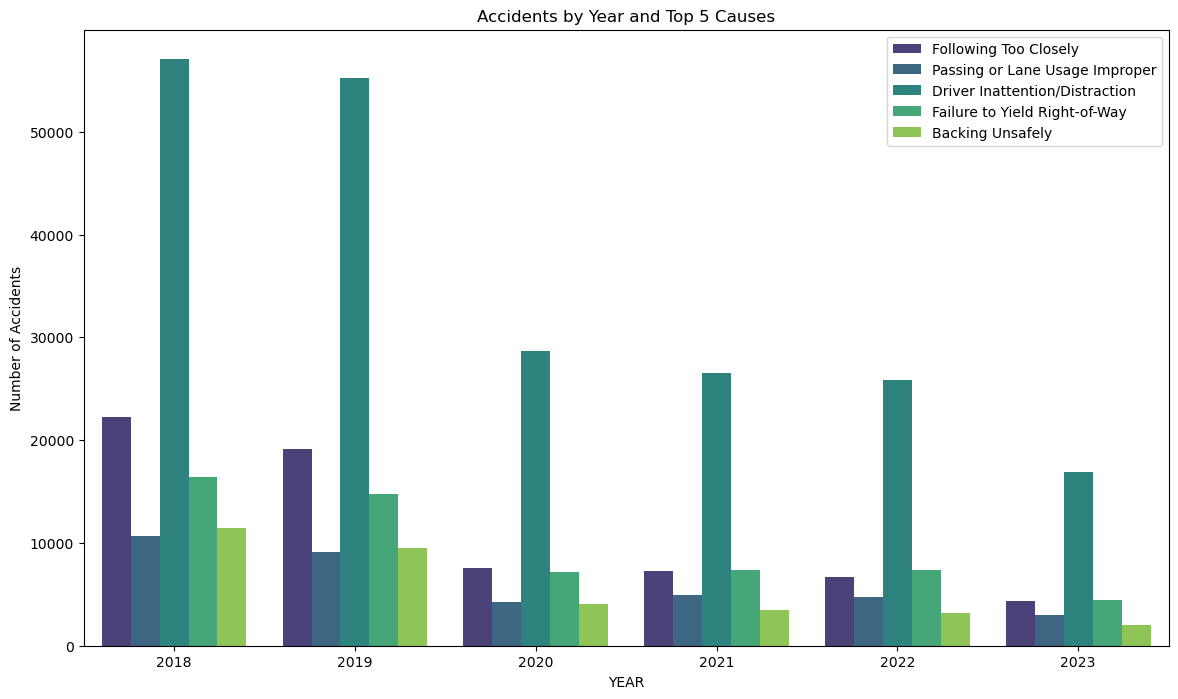

In [ ]:
top_causes = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(5).index
filtered_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_causes)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='YEAR', hue='CONTRIBUTING FACTOR VEHICLE 1', palette="viridis")
plt.title('Accidents by Year and Top 5 Causes')
plt.ylabel('Number of Accidents')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Im "renaming" the columns their original name because my code wasn't registering their name.
causation_mapping_df.columns = ["Causation Factor", "Category"]

df = df.merge(causation_mapping_df, how='left', left_on='CONTRIBUTING FACTOR VEHICLE 1', right_on='Causation Factor')

df['Category'] = df['Category'].fillna('Unknown')

df.drop(columns=['Causation Factor'], inplace=True)


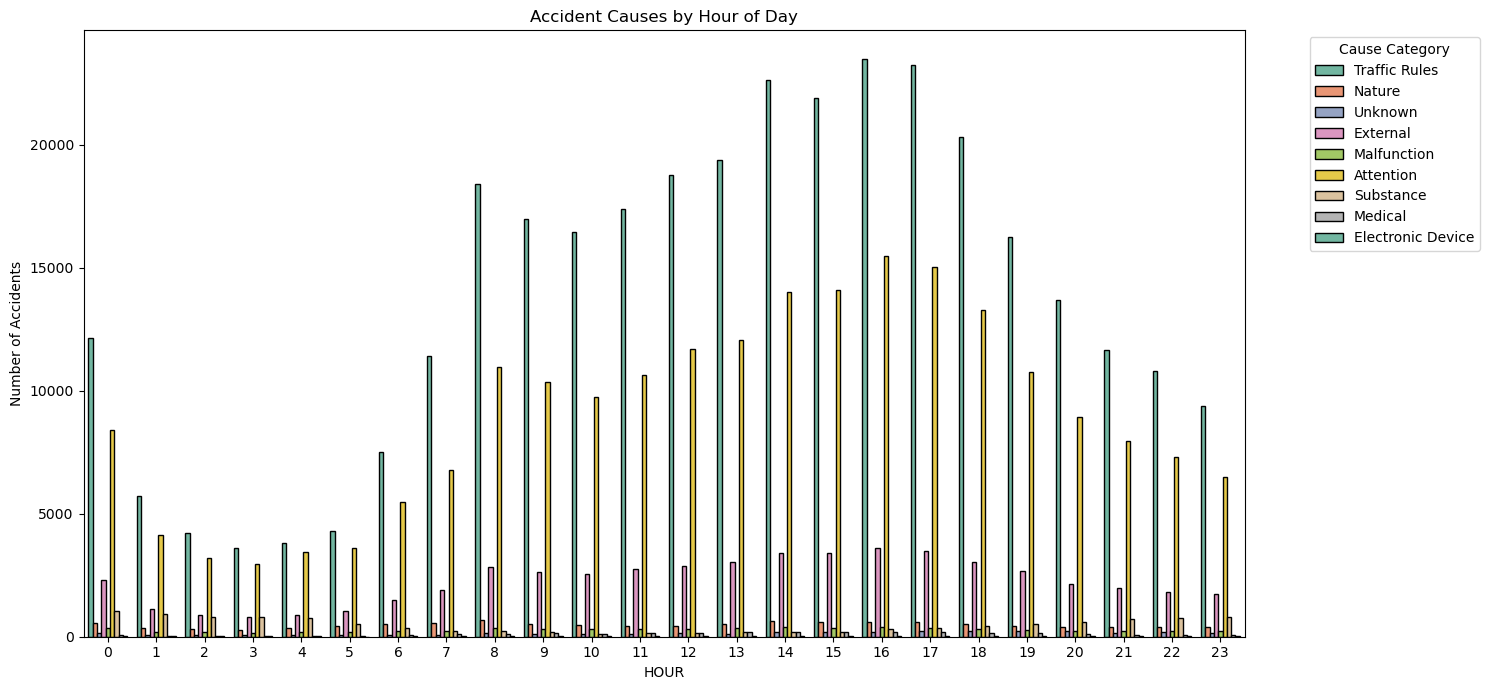

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='HOUR', hue='Category', palette="Set2", edgecolor='black')
plt.title('Accident Causes by Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


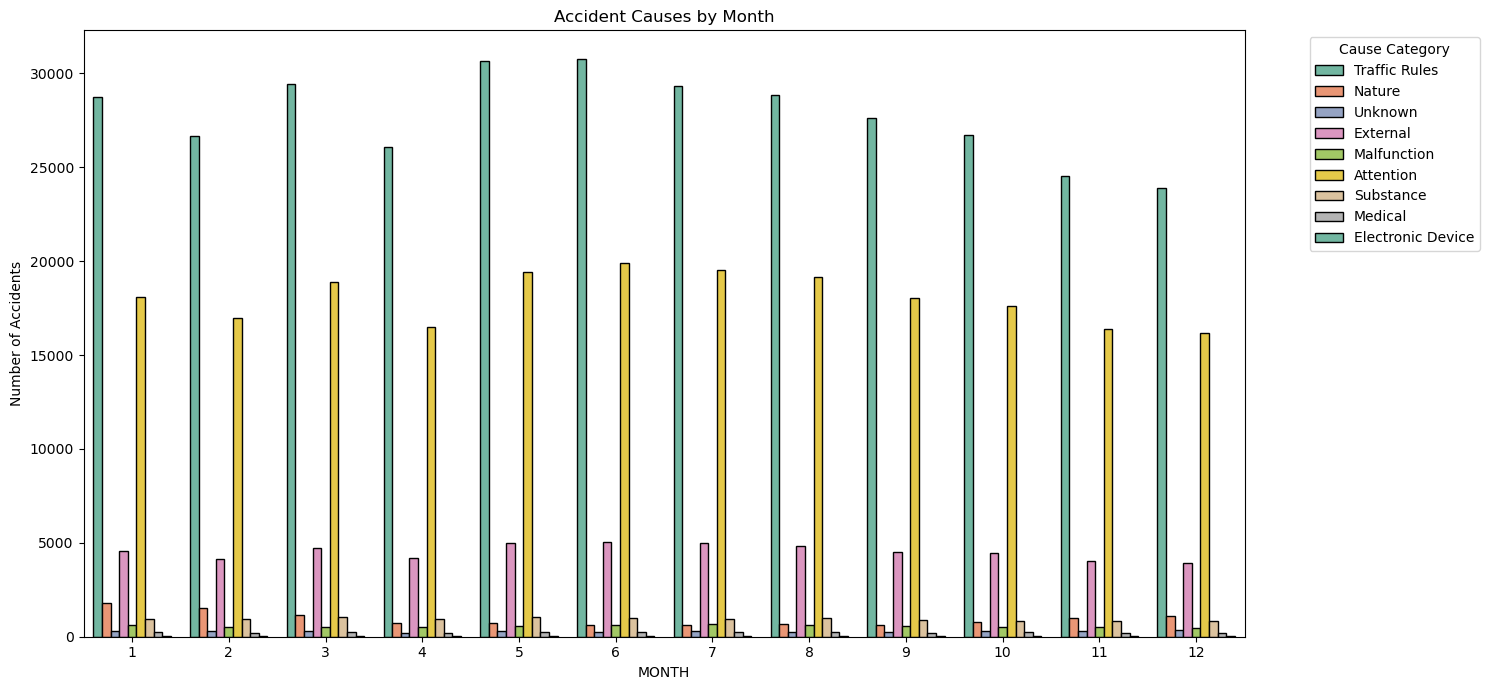

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='MONTH', hue='Category', palette="Set2", edgecolor='black')
plt.title('Accident Causes by Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top 3 causes by hour and by month

In [ ]:
# Identify top 3 causes across the whole dataset
top_3_causes = df['Category'].value_counts().index[:3]


By hour

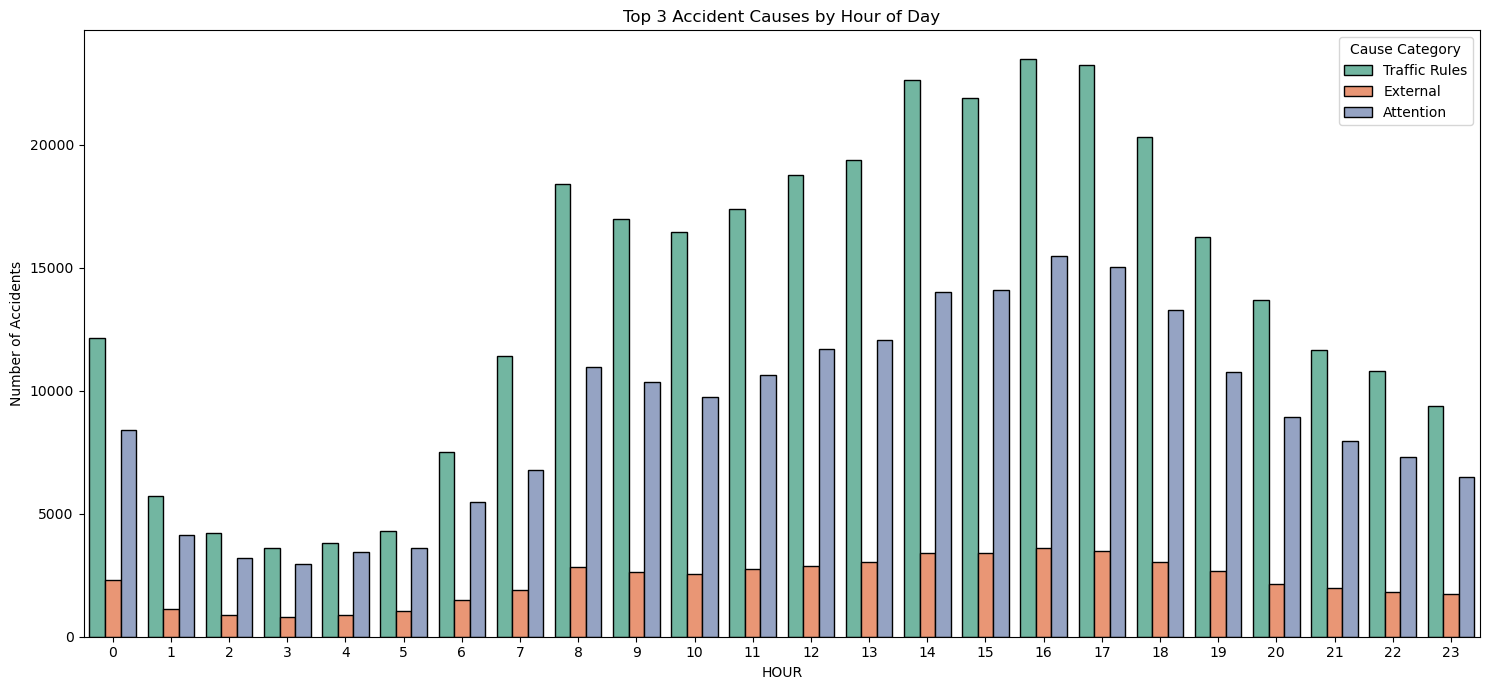

In [ ]:
filtered_df_hour = df[df['Category'].isin(top_3_causes)]

plt.figure(figsize=(15,7))
sns.countplot(data=filtered_df_hour, x='HOUR', hue='Category', palette="Set2", edgecolor='black')
plt.title('Top 3 Accident Causes by Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause Category')
plt.tight_layout()
plt.show()


By month

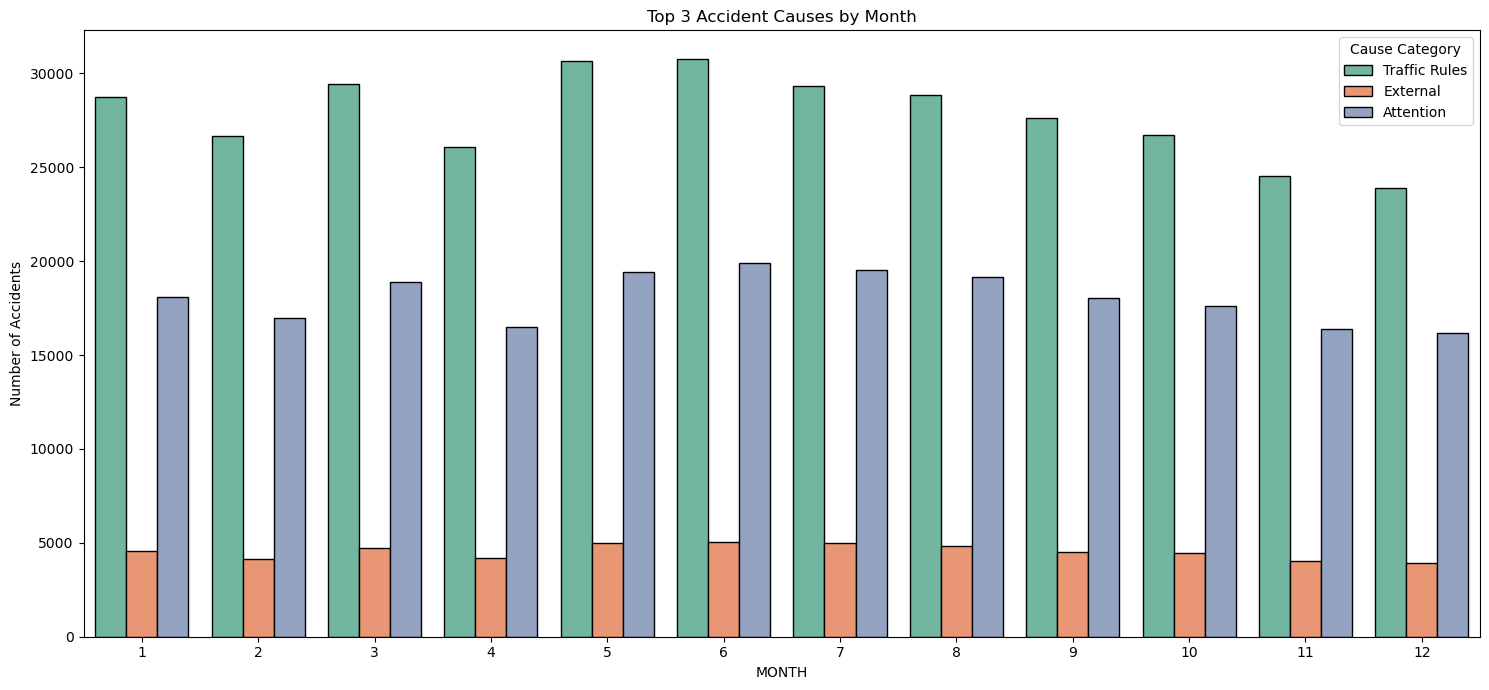

In [ ]:
filtered_df_month = df[df['Category'].isin(top_3_causes)]

plt.figure(figsize=(15,7))
sns.countplot(data=filtered_df_month, x='MONTH', hue='Category', palette="Set2", edgecolor='black')
plt.title('Top 3 Accident Causes by Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause Category')
plt.tight_layout()
plt.show()


Causes of major injury accidents.

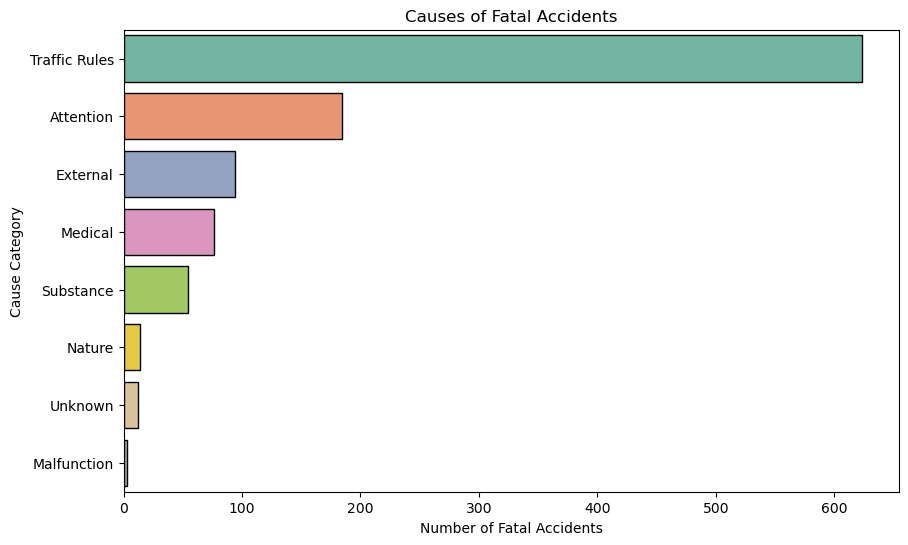

In [ ]:
# Only include rows where there are fatalities
fatal_accidents_df = df[df['NUMBER OF PERSONS KILLED'] > 0]

plt.figure(figsize=(10, 6))
sns.countplot(data=fatal_accidents_df, y='Category', order=fatal_accidents_df['Category'].value_counts().index, palette="Set2", edgecolor='black')
plt.title('Causes of Fatal Accidents')
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('Cause Category')
plt.show()


Let's look closer at fatalaties

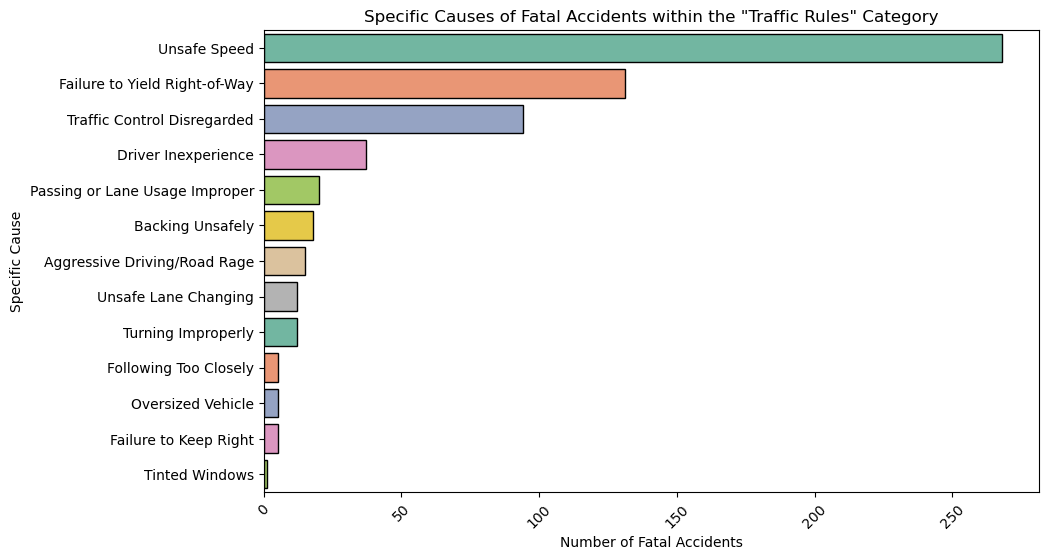

In [ ]:
traffic_rules_fatal_df = fatal_accidents_df[fatal_accidents_df['Category'] == 'Traffic Rules']

plt.figure(figsize=(10, 6))
sns.countplot(data=traffic_rules_fatal_df, y='CONTRIBUTING FACTOR VEHICLE 1', order=traffic_rules_fatal_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index, palette="Set2", edgecolor='black')
plt.title('Specific Causes of Fatal Accidents within the "Traffic Rules" Category')
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('Specific Cause')
plt.xticks(rotation=45)
plt.show()

Unsafe speeds is by far the primary reason for traffic related collision fatalities in New York city.

In [ ]:
fatalities_per_year_traffic_rules = traffic_rules_fatal_df.groupby('YEAR')['NUMBER OF PERSONS KILLED'].sum()

print(fatalities_per_year_traffic_rules)

YEAR
2018     96.0
2019     94.0
2020    136.0
2021    129.0
2022    130.0
2023     81.0
Name: NUMBER OF PERSONS KILLED, dtype: float64


At this point im trying to understand fatalaties a bit more. Let's look at unsafe speed fatalaties by season.

In [ ]:
# Grouping by 'SEASON', filtering by 'Unsafe Speed', and summing the fatalities
fatalities_by_season = df[
    (df['CAUSE CATEGORY'] == 'Traffic Rules') &
    (df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed')
].groupby('SEASON')['NUMBER OF PERSONS KILLED'].sum()

print(fatalities_by_season)



SEASON
Autumn     70.0
Spring     64.0
Summer    105.0
Winter     60.0
Name: NUMBER OF PERSONS KILLED, dtype: float64


The season with the highest fatalities due to unsafe speeds in Summer. There are a total of 45 more deaths during the summer seasons between 2018 and 2023, than the lowest sum of fatalities during Winter at 60.

Chi-Squared for significance

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# where 1 represents a fatality and 0 represents no fatality

# Creating a crosstab to find the frequency of fatalities in each season
contingency_table = pd.crosstab(df['SEASON'], df['NUMBER OF PERSONS KILLED'], margins=True)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# For interpreting the p-value
alpha = 0.05  # significance level
if p < alpha:
    print("We reject the null hypothesis, suggesting a significant association between season and fatalities.")
else:
    print("We fail to reject the null hypothesis, suggesting no significant association between season and fatalities.")


Chi2 value: 19.92515384781536
P-value: 0.4626203897280047
Degrees of freedom: 20
Expected frequencies table:
[[1.51837350e+05 2.41678663e+02 8.30918783e+00 1.42443220e+00
  2.37405367e-01 1.52089000e+05]
 [1.63658758e+05 2.60494732e+02 8.95610571e+00 1.53533241e+00
  2.55888735e-01 1.63930000e+05]
 [1.70547341e+05 2.71459251e+02 9.33307838e+00 1.59995629e+00
  2.66659382e-01 1.70830000e+05]
 [1.53526551e+05 2.44367354e+02 8.40162808e+00 1.44027910e+00
  2.40046517e-01 1.53781000e+05]
 [6.39570000e+05 1.01800000e+03 3.50000000e+01 6.00000000e+00
  1.00000000e+00 6.40630000e+05]]
We fail to reject the null hypothesis, suggesting no significant association between season and fatalities.


Based on the p-value, the test didn’t find strong enough evidence to reject the null hypothesis, which means that the variations in the fatalities across different seasons might be due to random chance. Though, it is my opinion, we are receiving this because the sample size is too small.


In [ ]:
df.info('COLUMN')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640639 entries, 0 to 640638
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     640639 non-null  datetime64[ns]
 1   CRASH TIME                     640639 non-null  object        
 2   BOROUGH                        401283 non-null  object        
 3   ZIP CODE                       401190 non-null  object        
 4   LATITUDE                       589307 non-null  float64       
 5   LONGITUDE                      589307 non-null  float64       
 6   LOCATION                       589307 non-null  object        
 7   ON STREET NAME                 494575 non-null  object        
 8   CROSS STREET NAME              310992 non-null  object        
 9   OFF STREET NAME                145386 non-null  object        
 10  NUMBER OF PERSONS INJURED      640638 non-null  float64       
 11  

In [ ]:
# Creating a new column to store the sum of injuries and fatalities
df['TOTAL_AFFECTED'] = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
                          'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                          'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                          'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum(axis=1)

# Filtering the df to include only rows where someone was either injured or killed
df_affected = df[df['TOTAL_AFFECTED'] > 0]

# Grouping the filtered df by season/ getting the count of affected individuals in each season
affected_by_season = df_affected.groupby('SEASON')['TOTAL_AFFECTED'].sum()

print(affected_by_season)


SEASON
Autumn    120981.0
Spring    125085.0
Summer    146198.0
Winter    109608.0
Name: TOTAL_AFFECTED, dtype: float64


Retry chi-squared with more data

In [ ]:
# Observed frequencies
observed_frequencies = [120981, 125085, 146198, 109608]

# Perform Chi-Square test now with more data
chi2_stat, p_val = stats.chisquare(observed_frequencies)

# Printing the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P Value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("We reject the null hypothesis: There is a significant association between the season and the number of people affected by collisions.")
else:
    print("We fail to reject the null hypothesis: There is no significant association between the season and the number of people affected by collisions.")


Chi2 Stat: 5591.484346606307
P Value: 0.0
We reject the null hypothesis: There is a significant association between the season and the number of people affected by collisions.


We have rejected the null hypothesis, so we see there is a significance between season and those effected physically by the collisions. However, there is not enough to reject the null in the case of deaths, so though the severity of the collisions resulting in some kind of injury are influenced by the seasons, the outcome of death (or so the most severe outcome and collisions), can not be said is influenced strongly be seasons.

In [ ]:
df['TOTAL_AFFECTED'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']

# Grouping data by borough, season, and then summing the total number of persons affected
borough_season_data = df.groupby(['BOROUGH', 'SEASON'])['TOTAL_AFFECTED'].sum().reset_index()

# Creating a contingency table
contingency_table = pd.pivot_table(borough_season_data, values='TOTAL_AFFECTED', index='BOROUGH', columns='SEASON', fill_value=0)

print(contingency_table)

chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2}")
print(f"P Value: {p}")

alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis: There is a significant association between the borough, season, and the number of people affected by collisions.")
else:
    print("We fail to reject the null hypothesis: There is no significant association between the borough, season, and the number of people affected by collisions.")


SEASON         Autumn  Spring  Summer  Winter
BOROUGH                                      
BRONX            6161    6618    7791    5639
BROOKLYN        11966   12328   15074   10860
MANHATTAN        5556    5871    6739    4869
QUEENS          10833   10988   12725    9936
STATEN ISLAND    1357    1527    1776    1360
Chi2 Stat: 49.95975843892542
P Value: 1.4200366863194215e-06
We reject the null hypothesis: There is a significant association between the borough, season, and the number of people affected by collisions.


Brooklyn showed the highest overall number of people affected across all seasons, followed by Queens, the Bronx, Manhattan, and Staten Island. We reject the null hypothesis, there is a significant association between the boroughs, seasons, and the number of people affected by collisions. In other words, the likelihood of people being affected by collisions appears to vary by borough and season.

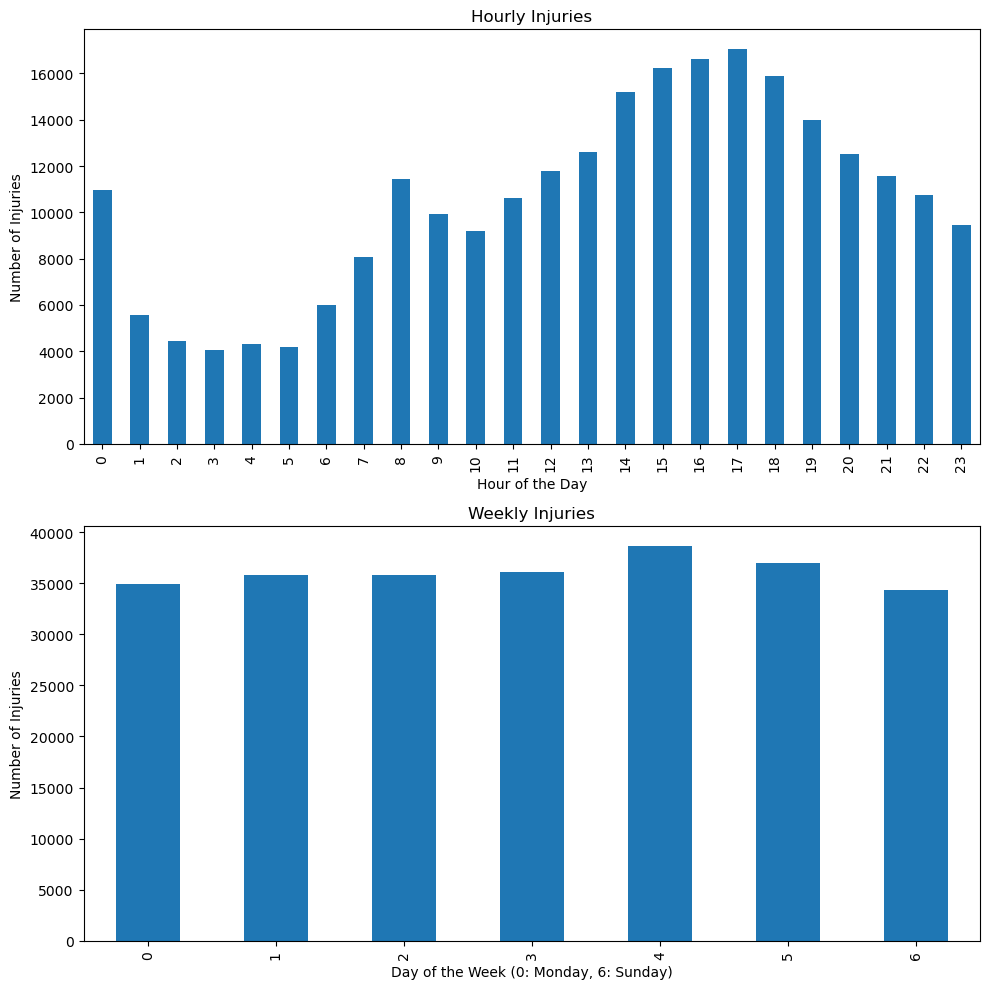

In [ ]:
df['HOUR'] = df['CRASH TIME'].apply(lambda x: x.hour)

df['DAY_OF_WEEK'] = df['CRASH DATE'].dt.dayofweek

hourly_injuries = df.groupby('HOUR')['NUMBER OF PERSONS INJURED'].sum()

weekly_injuries = df.groupby('DAY_OF_WEEK')['NUMBER OF PERSONS INJURED'].sum()

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

hourly_injuries.plot(kind='bar', ax=axs[0])
axs[0].set_title('Hourly Injuries')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Number of Injuries')

weekly_injuries.plot(kind='bar', ax=axs[1])
axs[1].set_title('Weekly Injuries')
axs[1].set_xlabel('Day of the Week (0: Monday, 6: Sunday)')
axs[1].set_ylabel('Number of Injuries')

plt.tight_layout()
plt.show()


There is not a great difference between respective days of the week when considering injuries. an uptick on fridays is the only major outlier represented.

In [ ]:
import scipy.stats as stats

hourly_injuries_df = df.groupby('HOUR')['NUMBER OF PERSONS INJURED'].sum().reset_index()

observed_frequencies = hourly_injuries_df['NUMBER OF PERSONS INJURED']

expected_frequencies = [sum(observed_frequencies)/len(observed_frequencies)] * len(observed_frequencies)

# Performing the Chi-squared test on hourly injuries
chi2_stat, p_val = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(f"Chi2 Stat: {chi2_stat}")
print(f"P Value: {p_val}")

if p_val < 0.05:
    print("We reject the null hypothesis: There is a significant association between the hour of the day and the number of injuries.")
else:
    print("We fail to reject the null hypothesis: There is no significant association between the hour of the day and the number of injuries.")


Chi2 Stat: 37883.72728064998
P Value: 0.0
We reject the null hypothesis: There is a significant association between the hour of the day and the number of injuries.


We reject the null hypothesis, there is a statistically significant difference between hour of the day and number of injuries.

In [ ]:
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Selecting the features and the target
features = ['BOROUGH', 'SEASON', 'HOUR']
target = 'NUMBER OF PERSONS INJURED'

X = df[features]
y = df[target]

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a column transformer for data pre-preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', "passthrough", ['HOUR']),
        ('cat', OneHotEncoder(), ['BOROUGH', 'SEASON'])])

# Creating a pipeline that first transforms the data and than fits the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculating the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.5191235139032003


In [ ]:
regressor = model.named_steps['regressor']

encoder = model.named_steps['preprocessor'].named_transformers_['cat']

feature_names = encoder.get_feature_names_out(input_features=['BOROUGH', 'SEASON'])

# Printing the coefficients
coefficients = regressor.coef_
for coef, name in zip(coefficients, feature_names):
    print(f"{name}: {coef}")


BOROUGH_BRONX: 0.0044063112120186244
BOROUGH_BROOKLYN: -3084941516.8814235
BOROUGH_MANHATTAN: -3084941516.8950877
BOROUGH_QUEENS: -3084941517.00548
BOROUGH_STATEN ISLAND: -3084941516.921163
SEASON_Autumn: -3084941516.9049277
SEASON_Spring: 4328662776.871538
SEASON_Summer: 4328662776.858354
SEASON_Winter: 4328662776.901569


The coefficients are enormous, and negative, which is indicative of major over-fitting and essentially a terrible model. I realize this is occurring because we fed the model the answers in the form of 'INJURY' features. Let's redo this.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
features = ['BOROUGH', 'SEASON']  # Add or remove features as needed

# Get dummies for categorical variables like BOROUGH and SEASON
X = pd.get_dummies(df[features])

# Target variable
y = df['NUMBER OF PERSONS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Correcting the prediction step

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Mean Squared Error: 0.520047518272003
                        Coefficient
BOROUGH_BRONX          3.028816e+08
BOROUGH_BROOKLYN       3.028816e+08
BOROUGH_MANHATTAN      3.028816e+08
BOROUGH_QUEENS         3.028816e+08
BOROUGH_STATEN ISLAND  3.028816e+08
SEASON_Autumn          6.097072e+09
SEASON_Spring          6.097072e+09
SEASON_Summer          6.097072e+09
SEASON_Winter          6.097072e+09


There is definetly something wrong with the model. Im going to try creating relationships within the features.

In [ ]:
import statsmodels.api as sm

In [ ]:
import pandas as pd

with open('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', 'r') as f:
    lines = f.readlines()
    for i in range(656688, 656694):  # Checking a few lines around the problematic row
        print(i, lines[i-1])  # Adjusting for 0-indexing
        df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


df.info()


656688 04/25/2018,8:39,,,40.63529,-73.958206,"(40.63529, -73.958206)",OCEAN AVENUE                    ,,,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,,,,3887903,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_11960/3195876149.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656689 05/08/2018,16:13,,,40.61384,-73.981445,"(40.61384, -73.981445)",65 STREET                       ,,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,3896211,Box Truck,Station Wagon/Sport Utility Vehicle,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_11960/3195876149.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656690 04/29/2018,14:45,BROOKLYN,11208,40.668613,-73.86857,"(40.668613, -73.86857)",,,2602      LINDEN BOULEVARD              ,0,0,0,0,0,0,0,0,Unspecified,,,,,3891070,Station Wagon/Sport Utility Vehicle,,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_11960/3195876149.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656691 05/14/2018,15:00,,,40.617573,-74.15293,"(40.617573, -74.15293)",,,5         DEPPE PLACE                   ,0,0,0,0,0,0,0,0,Following Too Closely,Following Too Closely,Unspecified,,,3900833,Sedan,Station Wagon/Sport Utility Vehicle,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_11960/3195876149.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656692 05/06/2018,11:30,BRONX,10458,40.856358,-73.88591,"(40.856358, -73.88591)",,,2457      HUGHES AVENUE                 ,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,,,,3896017,Station Wagon/Sport Utility Vehicle,,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_11960/3195876149.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656693 04/30/2018,9:25,,,40.75425,-73.827835,"(40.75425, -73.827835)",FRANKLIN AVENUE                 ,,,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Unspecified,,,3891379,Station Wagon/Sport Utility Vehicle,Sedan,AMBUL,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_11960/3195876149.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026646 entries, 0 to 2026645
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
df['YEAR'] = df['CRASH DATE'].apply(lambda x: int(x.split('/')[2]))
df = df[df['YEAR'] > 2017]
causation_mapping_df = pd.read_csv('causation_factor_mapping_file.csv')

def map_causation(cause, mapping_df):
    """Return the category corresponding to a causation factor."""

    if pd.isna(cause):
        return 'Unknown'

    return mapping_df[mapping_df['Causation Factor'] == cause]['Category'].iloc[0]


In [ ]:
df['CAUSE CATEGORY'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: map_causation(x, causation_mapping_df))
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME']).dt.time
df['MONTH'] = df['CRASH DATE'].dt.month
df['DAY'] = df['CRASH DATE'].dt.day
df['DAY_OF_WEEK'] = df['CRASH DATE'].dt.dayofweek
df['HOUR'] = df['CRASH DATE'].dt.hour

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['SEASON'] = df['MONTH'].apply(get_season)
from datetime import time

def get_time_period(t):
    if t < time(6, 0):
        return 'Night'
    elif t < time(12, 0):
        return 'Morning'
    elif t < time(17, 0):
        return 'Afternoon'
    elif t < time(20, 0):
        return 'Evening'
    else:
        return 'Night'

df['TIME_PERIOD'] = df['CRASH TIME'].apply(get_time_period)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837796 entries, 0 to 2026645
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     837796 non-null  datetime64[ns]
 1   CRASH TIME                     837796 non-null  object        
 2   BOROUGH                        546582 non-null  object        
 3   ZIP CODE                       546459 non-null  object        
 4   LATITUDE                       773527 non-null  float64       
 5   LONGITUDE                      773527 non-null  float64       
 6   LOCATION                       773527 non-null  object        
 7   ON STREET NAME                 624775 non-null  object        
 8   CROSS STREET NAME              404509 non-null  object        
 9   OFF STREET NAME                212276 non-null  object        
 10  NUMBER OF PERSONS INJURED      837790 non-null  float64       
 11 

Ok so i had to reload and reclean the dataset since i OneHotEncoded the column heads in a way I couldn't reverse.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Creating a binary column where 1 indicates injury and 0 indicates no injury
df['INJURED'] = np.where(df['NUMBER OF PERSONS INJURED'] > 0, 1, 0)

# Choosing predictor variables. Let's just use 'HOUR', 'BOROUGH', and 'SEASON' for this model
X = df[['HOUR', 'BOROUGH', 'SEASON']]

# Creating dummy variables for categorical columns ('BOROUGH' and 'SEASON')
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df['INJURED']

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and fitting the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84    182462
           1       0.00      0.00      0.00     68877

    accuracy                           0.73    251339
   macro avg       0.36      0.50      0.42    251339
weighted avg       0.53      0.73      0.61    251339

[[182462      0]
 [ 68877      0]]


/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df['INJURED_OR_KILLED'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']

# Count the number of incidents where at least one person was injured or killed
injured_or_killed_count = len(df[df['INJURED_OR_KILLED'] > 0])

# Count the number of incidents where no one was injured or killed
uninjured_count = len(df[df['INJURED_OR_KILLED'] == 0])

print(f"Number of incidents resulting in injury or fatality: {injured_or_killed_count}")
print(f"Number of incidents with no injuries or fatalities: {uninjured_count}")


Number of incidents resulting in injury or fatality: 230622
Number of incidents with no injuries or fatalities: 607157


In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn


In [ ]:
import pandas as pd


with open('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', 'r') as f:
    lines = f.readlines()
    for i in range(656688, 656694):  # Checking a few lines around the problematic row
        print(i, lines[i-1])  # Adjusting for 0-indexing
        df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656688 04/25/2018,8:39,,,40.63529,-73.958206,"(40.63529, -73.958206)",OCEAN AVENUE                    ,,,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,,,,3887903,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_14496/4121272538.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656689 05/08/2018,16:13,,,40.61384,-73.981445,"(40.61384, -73.981445)",65 STREET                       ,,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,3896211,Box Truck,Station Wagon/Sport Utility Vehicle,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_14496/4121272538.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656690 04/29/2018,14:45,BROOKLYN,11208,40.668613,-73.86857,"(40.668613, -73.86857)",,,2602      LINDEN BOULEVARD              ,0,0,0,0,0,0,0,0,Unspecified,,,,,3891070,Station Wagon/Sport Utility Vehicle,,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_14496/4121272538.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656691 05/14/2018,15:00,,,40.617573,-74.15293,"(40.617573, -74.15293)",,,5         DEPPE PLACE                   ,0,0,0,0,0,0,0,0,Following Too Closely,Following Too Closely,Unspecified,,,3900833,Sedan,Station Wagon/Sport Utility Vehicle,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_14496/4121272538.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656692 05/06/2018,11:30,BRONX,10458,40.856358,-73.88591,"(40.856358, -73.88591)",,,2457      HUGHES AVENUE                 ,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,,,,3896017,Station Wagon/Sport Utility Vehicle,,,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_14496/4121272538.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


656693 04/30/2018,9:25,,,40.75425,-73.827835,"(40.75425, -73.827835)",FRANKLIN AVENUE                 ,,,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Unspecified,,,3891379,Station Wagon/Sport Utility Vehicle,Sedan,AMBUL,,



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_14496/4121272538.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv', skiprows=[656692])


In [ ]:
df['YEAR'] = df['CRASH DATE'].apply(lambda x: int(x.split('/')[2]))
df = df[df['YEAR'] > 2017]
causation_mapping_df = pd.read_csv('causation_factor_mapping_file.csv')

def map_causation(cause, mapping_df):
    """Return the category corresponding to a causation factor."""

    if pd.isna(cause):
        return 'Unknown'

    return mapping_df[mapping_df['Causation Factor'] == cause]['Category'].iloc[0]

df['CAUSE CATEGORY'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: map_causation(x, causation_mapping_df))
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME']).dt.time
df['MONTH'] = df['CRASH DATE'].dt.month
df['DAY'] = df['CRASH DATE'].dt.day
df['DAY_OF_WEEK'] = df['CRASH DATE'].dt.dayofweek
df['HOUR'] = df['CRASH DATE'].dt.hour

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['SEASON'] = df['MONTH'].apply(get_season)
from datetime import time

def get_time_period(t):
    if t < time(6, 0):
        return 'Night'
    elif t < time(12, 0):
        return 'Morning'
    elif t < time(17, 0):
        return 'Afternoon'
    elif t < time(20, 0):
        return 'Evening'
    else:
        return 'Night'

df['TIME_PERIOD'] = df['CRASH TIME'].apply(get_time_period)

In [ ]:
# Creating a new column 'TARGET' which will be our binary target variable
df['TARGET'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']
df['TARGET'] = df['TARGET'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
# Taking a random subset of the data
df_sample = df.sample(frac=0.5, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Selecting only numeric columns for simplicity
df_sample_numeric = df_sample.select_dtypes(include=['number']).dropna()

# Defining X and y
X = df_sample_numeric.drop(['TARGET', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'], axis=1)
y = df_sample_numeric['TARGET']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Printing classification report for f1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.7257242628039318
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     56113
           1       0.00      0.00      0.00     21207

    accuracy                           0.73     77320
   macro avg       0.36      0.50      0.42     77320
weighted avg       0.53      0.73      0.61     77320



/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Dropping columns directly related to injuries and fatalities
columns_to_drop = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED',
    'TARGET'
]

# Selecting only numeric columns for simplicity and dropping columns related to injuries and fatalities
df_sample_numeric = df_sample.select_dtypes(include=['number']).drop(columns=columns_to_drop).dropna()

# Defining X and y
X = df_sample_numeric.dropna()
y = df_sample.loc[X.index]['TARGET']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Printing classification report for f1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.7256666925325264
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     56110
           1       0.00      0.00      0.00     21212

    accuracy                           0.73     77322
   macro avg       0.36      0.50      0.42     77322
weighted avg       0.53      0.73      0.61     77322



/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Dropping columns directly related to injuries and fatalities
columns_to_drop = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED',
    'TARGET'
]

# Selecting only numeric columns for simplicity and dropping columns related to injuries and fatalities
df_sample_numeric = df_sample.select_dtypes(include=['number']).drop(columns=columns_to_drop).dropna()

# Defining X and y
X = df_sample_numeric.dropna()
y = df_sample.loc[X.index]['TARGET']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model with balanced class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Printing classification report for f1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.2743333074674737
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56110
           1       0.27      1.00      0.43     21212

    accuracy                           0.27     77322
   macro avg       0.14      0.50      0.22     77322
weighted avg       0.08      0.27      0.12     77322



/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anovayoungers/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Selecting a subset of columns for simplicity
columns_to_use = [
    'BOROUGH', 'LATITUDE', 'LONGITUDE', 'HOUR'
]

# Handling the 'BOROUGH' categorical column
df_sample['BOROUGH'] = df_sample['BOROUGH'].astype('category').cat.codes

# Filtering the columns
df_filtered = df_sample[columns_to_use + ['TARGET']].dropna()

# Defining X and y
X = df_filtered.drop(columns=['TARGET'])
y = df_filtered['TARGET']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Printing classification report for f1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.7256666925325264
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     56110
           1       0.50      0.00      0.00     21212

    accuracy                           0.73     77322
   macro avg       0.61      0.50      0.42     77322
weighted avg       0.66      0.73      0.61     77322



The model still seems to struggle with identifying the minority class effectively. However, there's a slight improvement in the precision for the minority class (1), but the recall is still quite low, meaning that the model is still missing many actual positive instances.

Accuracy:
0.726 (or
72.6
%) shows that this is the proportion of correctly classified instances out of all instances.

Precision (for class 1):
0.50 This indicates that when the model predicts an injury, it's correct
50% of the time.

Recall (for class 1):
0.00 This indicates that the model correctly identifies
0% of all actual injury instances. It’s almost not capturing the minority class.

F1-score (for class 1):
0.00 The F1-score is a measure of a model’s precision and recall. The F1 score is quite low, indicating that the balance between precision and recall is off.

Including fatalities as a feature could help the model understand the severity of the accident, which might be correlated with injuries. Let's modify the previous Logistic Regression model to include fatalities as a feature while still predicting injuries.


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Selecting features and target
X = df[['HOUR', 'DAY', 'MONTH', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
        'NUMBER OF PERSONS KILLED']]  # Including 'NUMBER OF PERSONS KILLED'
y = df['TARGET']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensuring consistent columns in both train and test set
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Filling NaN values in the test set, introduced by alignment

# Building and fitting the model
model = HistGradientBoostingClassifier(max_iter=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7270188684123773
              precision    recall  f1-score   support

           0       0.73      1.00      0.84    112214
           1       1.00      0.01      0.01     42489

    accuracy                           0.73    154703
   macro avg       0.86      0.50      0.43    154703
weighted avg       0.80      0.73      0.61    154703



Precision (for Class 1: Injuries/Fatalities):

The precision is
≈99%, meaning that when the model predicts an injury or fatality, it's correct about 99% of the time. However, this is paired with a very low recall, meaning the model is being very conservative with its positive (1) predictions its ensuring that almost all of its positive predictions are correct.

Recall (for Class 1: Injuries/Fatalities):
The recall is
≈1%, this is terrible, the model identified only about 1% of all actual injury or fatality cases correctly. In practical terms, it is missing a large number of actual positive cases (injuries/fatalities), marking them as negatives (no injury/fatality).

F1-Score (for Class 1: Injuries/Fatalities):

The F1-score is
≈1%. The F1-score is the harmonic mean of precision and recall, giving a balance between the two. The low F1-score suggests that the balance between precision and recall is skewed, which is confirmed by the high precision but very low recall.
Class Imbalance:

From the classification report, it's evident that the model is better at predicting class 0 (no injury/fatality) than class 1 (injury/fatality). This is likely due to the class imbalance inherent in the dataset, where there are almost 400,000 more instances of no injuries or fatalities compared to cases with injuries or fatalities.

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
#'TARGET' is binary where 1 indicates injury or fatality
#training and test sets

X = df.drop(columns=['TARGET'])
X = df.drop(columns=['TARGET'])
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Go through each column and update the data type
for column in df.columns:
    if df[column].dtype == 'object':  # if the column is of object type
        try:
            df[column] = le.fit_transform(df[column])  # try label encoding
        except Exception as e:
            print(f"Could not encode column: {column}, Error: {e}")
            df = df.drop(columns=[column])  # drop the column if there is an error



In [ ]:
df = df.dropna()
df = df.dropna(axis=1)


In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(df.drop(columns=['TARGET']), df['TARGET'])

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

# Printing the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168330
           1       1.00      1.00      1.00     63724

    accuracy                           1.00    232054
   macro avg       1.00      1.00      1.00    232054
weighted avg       1.00      1.00      1.00    232054



In [ ]:
from sklearn.model_selection import cross_val_score

# Using cross_val_score to get a sense of overfitting
scores = cross_val_score(model, X_smote, y_smote, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [1.         0.99999554 1.         1.         0.93140204]
Mean cross-validation score: 0.9862795164226534


In [ ]:
import pandas as pd

file_path = 'Motor_Vehicle_Collisions_-_Crashes.csv'

# Loading the dataset
df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv')



/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_14496/1781655362.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/anovayoungers/Downloads/Collisions_Project/Motor_Vehicle_Collisions_-_Crashes.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026647 entries, 0 to 2026646
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
#setting target variable
def set_target(row):
    if row['NUMBER OF PEDESTRIANS INJURED'] > 0 or \
    row['NUMBER OF PEDESTRIANS KILLED'] > 0 or \
    row['NUMBER OF CYCLIST INJURED'] > 0 or \
    row['NUMBER OF CYCLIST KILLED'] > 0 or \
    row['NUMBER OF MOTORIST INJURED'] > 0 or \
    row['NUMBER OF MOTORIST KILLED'] > 0:
        return 1
    else:
        return 0

# Applying the function to each row in the dataframe to set the 'TARGET' value
df['TARGET'] = df.apply(set_target, axis=1)

In [ ]:
import pandas as pd

# Dropping LOCATION column as it might be redundant
df = df.drop(columns=['LOCATION'])

# Handling CRASH DATE and CRASH TIME
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])
df['HOUR'] = df['CRASH TIME'].dt.hour
df['DAY_OF_WEEK'] = df['CRASH DATE'].dt.dayofweek
df['MONTH'] = df['CRASH DATE'].dt.month

# Dropping ZIP CODE column, it would create too many unique columns post cleaning.
df = df.drop(columns=['ZIP CODE'])

# One-hot encoding BOROUGH
df = pd.get_dummies(df, columns=['BOROUGH'])

# Dropping rows where LATITUDE or LONGITUDE is NaN
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])


In [ ]:
from sklearn.model_selection import train_test_split

# Only cleaned features above
X = df[['LATITUDE', 'LONGITUDE', 'HOUR', 'DAY_OF_WEEK', 'MONTH']]
borough_columns = [col for col in df.columns if 'BOROUGH' in col]  # getting the one-hot encoded BOROUGH columns
X = pd.concat([X, df[borough_columns]], axis=1)

# Selecting the target variable
y = df['TARGET']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/de/ea/90267db2c02fb61f4d03b9645c7446d3cbca6d5c08522e889535c88edfcd/tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.14.0 from https://files.pythonhosted.org/packages/d3/4b/ae9037ea22ba94eb2cf267e991384c3444f3e6142fa49923352b4ab73e14/tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency inf

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
35927/35927 [==============================] - 19s 515us/step - loss: 0.5316 - accuracy: 0.7755 - val_loss: 0.5272 - val_accuracy: 0.7762
Epoch 2/10
35927/35927 [==============================] - 18s 511us/step - loss: 0.5284 - accuracy: 0.7757 - val_loss: 0.5276 - val_accuracy: 0.7762
Epoch 3/10
35927/35927 [==============================] - 18s 512us/step - loss: 0.5282 - accuracy: 0.7757 - val_loss: 0.5266 - val_accuracy: 0.7762
Epoch 4/10
35927/35927 [==============================] - 18s 512us/step - loss: 0.5280 - accuracy: 0.7757 - val_loss: 0.5266 - val_accuracy: 0.7762
Epoch 5/10
35927/35927 [==============================] - 18s 512us/step - loss: 0.5279 - accuracy: 0.7757 - val_loss: 0.5266 - val_accuracy: 0.7762
Epoch 6/10
35927/35927 [==============================] - 18s 511us/step - loss: 0.5279 - accuracy: 0.7757 - val_loss: 0.5268 - val_accuracy: 0.7762
Epoch 7/10
35927/35927 [==============================] - 18s 511us/step - loss: 0.5279 - accuracy: 0.7757